In [5]:
# hello world 출력
import tensorflow as tf

hello=tf.constant("hello world")

normal = tf.random_normal([3,3,3],mean=0.0,stddev=2.0)

sess=tf.Session()
print(sess.run(normal))

[[[-2.89366865  1.61022258  0.05238476]
  [-0.28140247 -1.58284414 -0.07612471]
  [-0.66294926 -0.26632863 -4.48580933]]

 [[ 0.00737106 -2.97720289  1.74082482]
  [ 0.38096645 -0.36471251 -0.13910326]
  [ 0.15412027 -0.3940011  -2.36580968]]

 [[ 0.44241822 -1.85419166 -0.92304909]
  [-3.42327046  0.231162    1.81658447]
  [ 1.52354133  1.73940587  0.36173391]]]


In [14]:
#플레이스 홀더와 변수
import tensorflow as tf

# 실수형을 입력받음. 차원의 요소는 3개
x=tf.placeholder(tf.float32,[None,3])
print(x)

# x 플레이스홀더에 넣을 값
x_data = [[1,2,3],[4,5,6]]

# 그래프를 계산하면서 최적화 할 변수들. 신경망을 좌우하는 값들
W=tf.Variable(tf.random_normal([3,2]))
b=tf.Variable(tf.random_normal([2,1]))

# 입력값과 변수들을 계산할 수식 작성
expr = tf.matmul(x,W) + b
sess = tf.Session()
# 위에서 설정한 variable들을 초기화하기위해 tf.global_variables_initlizer 시행
sess.run(tf.global_variables_initializer())

#x에는 입력값이 필요
feed_dict={x:x_data}

print("===x_data===")
print(x_data)
print("===W===")
print(sess.run(W))
print("===b===")
print(sess.run(b))
print("===expr===")
print(sess.run(expr,feed_dict))

sess.close()

Tensor("Placeholder_4:0", shape=(?, 3), dtype=float32)
===x_data===
[[1, 2, 3], [4, 5, 6]]
===W===
[[-0.2308792   0.89220202]
 [ 0.02121088 -0.70646054]
 [-2.1765964  -0.2733466 ]]
===b===
[[ 0.03637596]
 [-1.32353902]]
===expr===
[[ -6.68187046  -1.3043828 ]
 [-15.20057869  -2.92711306]]


In [27]:
# 선형회귀
import tensorflow as tf

#추론함수
x_train=[1,2,3]
y_train=[1,2,3]

W=tf.Variable(tf.random_normal([1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = x_train*W+b

#비용함수
cost=tf.reduce_mean(tf.square(hypothesis-y_train))

# 그래프 만들어서 최솟값 구하는 과정
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)

# session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("step  cost        W             b")
print("======================================")
for step in range(2001):
    sess.run(train)
    if step % 20 ==0 :
        print(step,sess.run(cost),sess.run(W),sess.run(b))

step  cost        W             b
0 0.170518 [ 1.13825965] [ 0.12068915]
20 0.0018706 [ 0.99423701] [ 0.05451974]
40 0.000311731 [ 0.98141283] [ 0.04619697]
60 0.000270541 [ 0.9810394] [ 0.04347735]
80 0.000245595 [ 0.98181182] [ 0.04138185]
100 0.000223054 [ 0.98265523] [ 0.03943211]
120 0.000202579 [ 0.98346931] [ 0.03757849]
140 0.000183987 [ 0.98424608] [ 0.0358124]
160 0.000167099 [ 0.98498636] [ 0.03412936]
180 0.000151763 [ 0.98569196] [ 0.03252543]
200 0.000137834 [ 0.98636442] [ 0.03099687]
220 0.000125184 [ 0.98700523] [ 0.02954013]
240 0.000113693 [ 0.987616] [ 0.02815185]
260 0.000103257 [ 0.98819792] [ 0.02682882]
280 9.37806e-05 [ 0.9887526] [ 0.02556798]
300 8.51742e-05 [ 0.98928112] [ 0.02436641]
320 7.73562e-05 [ 0.98978478] [ 0.02322137]
340 7.02564e-05 [ 0.99026495] [ 0.02213011]
360 6.38082e-05 [ 0.99072254] [ 0.02109003]
380 5.79512e-05 [ 0.99115843] [ 0.02009887]
400 5.26319e-05 [ 0.99157399] [ 0.01915429]
420 4.78019e-05 [ 0.99197] [ 0.01825411]
440 4.34135e-05 [

In [37]:
# 10 placeholder
import tensorflow as tf

#추론함수

W=tf.Variable(tf.random_normal([1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')
X=tf.placeholder(tf.float32,shape=[None])
Y=tf.placeholder(tf.float32,shape=[None])

hypothesis = X*W+b

#비용함수
cost=tf.reduce_mean(tf.square(hypothesis-Y))

# 그래프 만들어서 최솟값 구하는 과정
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)

# session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print("step  cost        W             b")
print("======================================")
for step in range(2001):
    cost_val, W_val, b_val,_=sess.run([cost,W,b,train],feed_dict={X:[1,2,3],Y:[1,2,3]})
    if step % 20 ==0 :
       print(step,cost_val,W_val,b_val)


step  cost        W             b
0 1.0793 [ 1.576051] [-0.35240874]
20 0.0431796 [ 1.24638534] [-0.46895823]
40 0.0307204 [ 1.20599341] [-0.45959374]
60 0.0278236 [ 1.19356883] [-0.43920138]
80 0.0252692 [ 1.18421066] [-0.41867548]
100 0.0229499 [ 1.17552853] [-0.39901024]
120 0.0208434 [ 1.16727698] [-0.38025922]
140 0.0189304 [ 1.15941548] [-0.36238858]
160 0.0171929 [ 1.15192354] [-0.34535766]
180 0.0156148 [ 1.14478362] [-0.32912722]
200 0.0141816 [ 1.13797915] [-0.31365934]
220 0.01288 [ 1.13149476] [-0.29891852]
240 0.0116978 [ 1.12531507] [-0.28487033]
260 0.0106241 [ 1.11942565] [-0.27148253]
280 0.00964902 [ 1.11381304] [-0.25872386]
300 0.00876339 [ 1.10846424] [-0.24656478]
320 0.00795906 [ 1.10336685] [-0.23497713]
340 0.00722851 [ 1.09850883] [-0.22393399]
360 0.00656506 [ 1.09387934] [-0.21340992]
380 0.00596249 [ 1.08946741] [-0.20338038]
400 0.00541522 [ 1.08526278] [-0.19382228]
420 0.00491821 [ 1.08125567] [-0.18471336]
440 0.00446678 [ 1.07743692] [-0.17603241]
460 

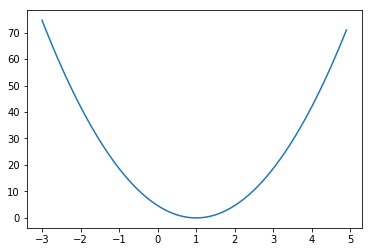

In [31]:
#11 차트 그리기
import tensorflow as tf
import matplotlib.pyplot as plt
X=[1,2,3]
Y=[1,2,3]
W=tf.placeholder(tf.float32)
hypothesis=X*W
cost=tf.reduce_mean(tf.square(hypothesis-Y))
sess=tf.Session()
sess.run(tf.initialize_all_variables())
W_val=[]
cost_val=[]
for i in range(-30,50):
    feed_W=i*0.1
    curr_cost,curr_W=sess.run([cost,W],feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
plt.plot(W_val,cost_val)
plt.show()

In [41]:
#15 예제2
import tensorflow as tf

X=[1,2,3]
Y=[1,2,3]

#set wrong model weight
W=tf.Variable(5.0) 

hypothesis=X*W

cost=tf.reduce_mean(tf.square(hypothesis-Y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.initialize_all_variables())

for step in range(10):
    print(step,sess.run(W))
    sess.run(train)

0 5.0
1 1.26667
2 1.01778
3 1.00119
4 1.00008
5 1.00001
6 1.0
7 1.0
8 1.0
9 1.0


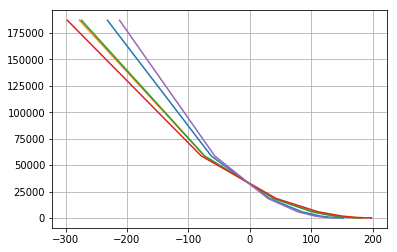

In [46]:
#16 다변량 예측

import tensorflow as tf

x1_data=[73.,93.,89.,96.,73.]
x2_data=[80.,88.,91.,98.,66.]
x3_data=[75.,93.,90.,100.,70.]
y_data=[152.,185.,180.,196.,142.]

x1=tf.placeholder(tf.float32)
x2=tf.placeholder(tf.float32)
x3=tf.placeholder(tf.float32)

Y=tf.placeholder(tf.float32)

w1=tf.Variable(tf.random_normal([1]),name='weight1')
w2=tf.Variable(tf.random_normal([1]),name='weight2')
w3=tf.Variable(tf.random_normal([1]),name='weight3')
b=tf.Variable(tf.random_normal([1]),name='bias')

hypothesis=x1*w1+x2*w2+x3*w3+b

cost=tf.reduce_mean(tf.square(hypothesis-Y))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.initialize_all_variables())

hy_vals=[]
cost_vals=[]

for step in range(2001):
    cost_val,hy_val,_=sess.run([cost,hypothesis,train],feed_dict={x1:x1_data,x2:x2_data,x3:x3_data,Y:y_data})
    hy_vals.append(hy_val)
    cost_vals.append(cost_val)
    if (i % 10==0) :
        print(i,"Cost:",cost_val,"\nPrediction:\n",hy_val)
        
plt.plot(hy_vals,cost_vals)
plt.grid(True)
plt.show()

In [69]:
# 17. 파일을 이용한 데이터 로딩
import numpy as np

xy=np.loadtxt('data-01-score.csv',delimiter=',',dtype=np.float32)
x_data=xy[:,0:-1]
y_data=xy[:,[-1]]

print("[x]\n")
print(x_data.shape)
print(x_data)
print("\n[y]\n")
print(y_data.shape)
print(y_data)

X = tf.placeholder(tf.float32,shape=[None,3])
Y = tf.placeholder(tf.float32,shape=[None,1])

W = tf.Variable(tf.random_normal([3,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = tf.matmul(X,W)+b

cost = tf.reduce_mean(tf.square(hypothesis-Y))


costmizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess=tf.Session()
sess.run(tf.initialize_all_variables())


hy_vals=[]
cost_vals=[]

for i in range(100):
    cost_val,hy_val,_=sess.run([cost,hypothesis,train],feed_dict={X: x_data, Y:y_data})
    #hy_vals.append(hy_tmp)
    cost_vals.append(cost_val)
    if(i%10==0):
        print ( i, "cost:",cost_val,"\nPrediction:\n",hy_val)
        
print("점수",sess.run(hypothesis,feed_dict={X:[[100,70,101]]}))
print("점수",sess.run(hypothesis,feed_dict={X:[[100,70,101]]}))

[x]

(6, 3)
[[  73.   80.   75.]
 [  93.   88.   93.]
 [  89.   91.   90.]
 [  96.   98.  100.]
 [  73.   66.   70.]
 [  53.   46.   55.]]

[y]

(6, 1)
[[ 152.]
 [ 185.]
 [ 180.]
 [ 196.]
 [ 142.]
 [ 101.]]
0 cost: 64770.0 
Prediction:
 [[ -84.82224274]
 [-104.11295319]
 [-101.28760529]
 [-112.08740997]
 [ -78.55246735]
 [ -61.0645256 ]]
10 cost: 5.15055 
Prediction:
 [[ 152.4309845 ]
 [ 181.14051819]
 [ 179.72840881]
 [ 193.94692993]
 [ 139.03489685]
 [  99.34432983]]
20 cost: 2.16941 
Prediction:
 [[ 154.03173828]
 [ 183.07542419]
 [ 181.62921143]
 [ 196.01785278]
 [ 140.51266479]
 [ 100.4363327 ]]
30 cost: 2.15879 
Prediction:
 [[ 154.03649902]
 [ 183.0914917 ]
 [ 181.63963318]
 [ 196.03010559]
 [ 140.52676392]
 [ 100.44931793]]
40 cost: 2.14835 
Prediction:
 [[ 154.03050232]
 [ 183.09461975]
 [ 181.63731384]
 [ 196.02848816]
 [ 140.53097534]
 [ 100.45500183]]
50 cost: 2.138 
Prediction:
 [[ 154.02441406]
 [ 183.09757996]
 [ 181.63487244]
 [ 196.02668762]
 [ 140.5350647 ]
 [ 100.460